<a href="https://colab.research.google.com/github/natdebandi/migmobs/blob/main/dataset_construction_v1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MIGMOBS

## Dataset construction V01

**Natalia Dedandi**




## (1) Get mobility data for ARGENTINA & CHILE

https://migrationpolicycentre.eu/global-mobilities/

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# prompt: open a csv file forma drive folder

from google.colab import drive
drive.mount('/content/drive', force_remount=True)

# Replace 'your_file_path' with the actual path to your CSV file in Google Drive
file_path = '/content/drive/MyDrive/3. Proyectos/MIGMOBS_nat/3_data_repository/gm_argentina.csv'

df = pd.read_csv(file_path)
print(df.head())


Mounted at /content/drive
   source_name  target_name source_iso3 target_iso3  year  estimated_trips  \
0  Afghanistan       Rwanda         AFG         RWA  2014             29.0   
1  Afghanistan  Netherlands         AFG         NLD  2014           6991.0   
2  Afghanistan        Congo         AFG         COG  2011              0.0   
3  Afghanistan      Hungary         AFG         HUN  2012            308.0   
4  Afghanistan   Cabo Verde         AFG         CPV  2012              0.0   

       dist source_region target_region source_subregion    target_subregion  
0  5755.222          Asia        Africa    Southern Asia  Sub-Saharan Africa  
1  5361.400          Asia        Europe    Southern Asia      Western Europe  
2  7100.583          Asia        Africa    Southern Asia  Sub-Saharan Africa  
3  4367.694          Asia        Europe    Southern Asia      Eastern Europe  
4  9324.580          Asia        Africa    Southern Asia  Sub-Saharan Africa  


**Number of movements from any country to Country of Analysis (ARG, CHIL)**

In [3]:
# Filter of countries of interest
#countries = ['ARG', 'CHL', 'BOL', 'VEN']
countries = ['ARG', 'CHL']
latam_df = df[(df['target_iso3'].isin(countries))]
print(latam_df.head())

     source_name target_name source_iso3 target_iso3  year  estimated_trips  \
220  Afghanistan   Argentina         AFG         ARG  2012             19.0   
232  Afghanistan       Chile         AFG         CHL  2014             14.0   
259  Afghanistan   Argentina         AFG         ARG  2014             31.0   
344  Afghanistan       Chile         AFG         CHL  2016             30.0   
391  Afghanistan       Chile         AFG         CHL  2015             18.0   

        dist source_region target_region source_subregion  \
220  15298.5          Asia      Americas    Southern Asia   
232  16353.9          Asia      Americas    Southern Asia   
259  15298.5          Asia      Americas    Southern Asia   
344  16353.9          Asia      Americas    Southern Asia   
391  16353.9          Asia      Americas    Southern Asia   

                    target_subregion  
220  Latin America and the Caribbean  
232  Latin America and the Caribbean  
259  Latin America and the Caribbean  
34

In [4]:
#contruyo un indicador por pais de destino y otro de origen sumando los estimated_by_hundred
latam_df_target = latam_df.groupby(['year', 'target_name','target_iso3',])['estimated_trips'].sum().reset_index()
latam_df_target

,year,target_name,target_iso3,estimated_trips
0,2011,Argentina,ARG,12133921.0
1,2011,Chile,CHL,5916559.0
2,2012,Argentina,ARG,12678938.0
3,2012,Chile,CHL,6528705.0
4,2013,Argentina,ARG,12500972.0
5,2013,Chile,CHL,6644472.0
6,2014,Argentina,ARG,13044692.0
7,2014,Chile,CHL,7172922.0
8,2015,Argentina,ARG,15021604.0
9,2015,Chile,CHL,8405899.0


In [5]:
db_indicators = latam_df_target[['target_iso3', 'target_name', 'year','estimated_trips']]
db_indicators = db_indicators.rename(columns={
    'target_iso3': 'country_code',
    'target_name': 'country_source',
    'year': 'year',
    'estimated_trips': 'value'
})
print(db_indicators.head())

  country_code country_source  year       value
0          ARG      Argentina  2011  12133921.0
1          CHL          Chile  2011   5916559.0
2          ARG      Argentina  2012  12678938.0
3          CHL          Chile  2012   6528705.0
4          ARG      Argentina  2013  12500972.0


In [6]:
db_indicators['indicator'] = 'target_mobility'
db_indicators['fuente'] = 'Mobitity'

In [7]:
db_indicators

,country_code,country_source,year,value,indicator,fuente
0,ARG,Argentina,2011,12133921.0,target_mobility,Mobitity
1,CHL,Chile,2011,5916559.0,target_mobility,Mobitity
2,ARG,Argentina,2012,12678938.0,target_mobility,Mobitity
3,CHL,Chile,2012,6528705.0,target_mobility,Mobitity
4,ARG,Argentina,2013,12500972.0,target_mobility,Mobitity
5,CHL,Chile,2013,6644472.0,target_mobility,Mobitity
6,ARG,Argentina,2014,13044692.0,target_mobility,Mobitity
7,CHL,Chile,2014,7172922.0,target_mobility,Mobitity
8,ARG,Argentina,2015,15021604.0,target_mobility,Mobitity
9,CHL,Chile,2015,8405899.0,target_mobility,Mobitity


**Number of movements from country of analysis (ARG or CHile) to other countries (any)**

In [8]:
# Filter of countries of interest
#countries = ['ARG', 'CHL', 'BOL', 'VEN']
countries = ['ARG', 'CHL']
latam_df = df[(df['source_iso3'].isin(countries))]
print(latam_df.head())

     source_name target_name source_iso3 target_iso3  year  estimated_trips  \
7020   Argentina     Algeria         ARG         DZA  2013            196.0   
7021   Argentina        Niue         ARG         NIU  2014              1.0   
7022   Argentina   Nicaragua         ARG         NIC  2014           2187.0   
7023   Argentina       Congo         ARG         COG  2015             20.0   
7024   Argentina     Armenia         ARG         ARM  2015            430.0   

           dist source_region target_region                 source_subregion  \
7020  10188.350      Americas        Africa  Latin America and the Caribbean   
7021  10646.680      Americas       Oceania  Latin America and the Caribbean   
7022   5975.677      Americas      Americas  Latin America and the Caribbean   
7023   8261.970      Americas        Africa  Latin America and the Caribbean   
7024  13417.640      Americas          Asia  Latin America and the Caribbean   

                     target_subregion  
7020

In [9]:
#contruyo un indicador por pais de origen hacia cualquier otro pais
latam_df_source = latam_df.groupby(['year', 'source_name','source_iso3',])['estimated_trips'].sum().reset_index()
latam_df_source

,year,source_name,source_iso3,estimated_trips
0,2011,Argentina,ARG,12054578.0
1,2011,Chile,CHL,5927374.0
2,2012,Argentina,ARG,12594641.0
3,2012,Chile,CHL,6550168.0
4,2013,Argentina,ARG,12406685.0
5,2013,Chile,CHL,6669163.0
6,2014,Argentina,ARG,12958212.0
7,2014,Chile,CHL,7231466.0
8,2015,Argentina,ARG,14877831.0
9,2015,Chile,CHL,8503460.0


In [10]:
db_temp = latam_df_source[['source_iso3', 'source_name', 'year','estimated_trips']]
db_temp = db_temp.rename(columns={
    'source_iso3': 'country_code',
    'source_name': 'country_source',
    'year': 'year',
    'estimated_trips': 'value'
})
print(db_temp.head())

  country_code country_source  year       value
0          ARG      Argentina  2011  12054578.0
1          CHL          Chile  2011   5927374.0
2          ARG      Argentina  2012  12594641.0
3          CHL          Chile  2012   6550168.0
4          ARG      Argentina  2013  12406685.0


In [11]:
db_temp['indicator'] = 'source_mobility'
db_temp['fuente'] = 'Mobitity'

In [12]:
db_indicators = pd.concat([db_indicators, db_temp], axis=0)
db_indicators.head()

,country_code,country_source,year,value,indicator,fuente
0,ARG,Argentina,2011,12133921.0,target_mobility,Mobitity
1,CHL,Chile,2011,5916559.0,target_mobility,Mobitity
2,ARG,Argentina,2012,12678938.0,target_mobility,Mobitity
3,CHL,Chile,2012,6528705.0,target_mobility,Mobitity
4,ARG,Argentina,2013,12500972.0,target_mobility,Mobitity


**I1.3 Number of movements from any country in the Americas to Country of Analysis (ARG y CHI)**

In [13]:
df

,source_name,target_name,source_iso3,target_iso3,year,estimated_trips,dist,source_region,target_region,source_subregion,target_subregion
0,Afghanistan,Rwanda,AFG,RWA,2014,29.0,5755.222,Asia,Africa,Southern Asia,Sub-Saharan Africa
1,Afghanistan,Netherlands,AFG,NLD,2014,6991.0,5361.400,Asia,Europe,Southern Asia,Western Europe
2,Afghanistan,Congo,AFG,COG,2011,0.0,7100.583,Asia,Africa,Southern Asia,Sub-Saharan Africa
3,Afghanistan,Hungary,AFG,HUN,2012,308.0,4367.694,Asia,Europe,Southern Asia,Eastern Europe
4,Afghanistan,Cabo Verde,AFG,CPV,2012,0.0,9324.580,Asia,Africa,Southern Asia,Sub-Saharan Africa
...,...,...,...,...,...,...,...,...,...,...,...
229315,Zimbabwe,Romania,ZWE,ROU,2015,79.0,NaN,Africa,Europe,Sub-Saharan Africa,Eastern Europe
229316,Zimbabwe,Cabo Verde,ZWE,CPV,2012,19.0,7006.872,Africa,Africa,Sub-Saharan Africa,Sub-Saharan Africa
229317,Zimbabwe,Romania,ZWE,ROU,2013,80.0,NaN,Africa,Europe,Sub-Saharan Africa,Eastern Europe
229318,Zimbabwe,Malta,ZWE,MLT,2014,19.0,6228.657,Africa,Europe,Sub-Saharan Africa,Southern Europe


In [14]:
df_temp = df.groupby(['source_subregion'])['estimated_trips'].sum().reset_index()
df_temp

,source_subregion,estimated_trips
0,Australia and New Zealand,1.766747e+08
1,Central Asia,1.338656e+08
2,Eastern Asia,2.658949e+09
3,Eastern Europe,1.757565e+09
4,Latin America and the Caribbean,8.660251e+08
5,Melanesia,9.284035e+06
6,Micronesia,1.545614e+06
7,Northern Africa,2.513967e+08
8,Northern America,1.284468e+09
9,Northern Europe,1.507993e+09


In [15]:
# Filter of countries of interest
#countries = ['ARG', 'CHL', 'BOL', 'VEN']
countries = ['ARG', 'CHL']
latam_df = df[(df['target_iso3'].isin(countries)) & (df['source_subregion']=='Latin America and the Caribbean')]
print(latam_df.head())

              source_name target_name source_iso3 target_iso3  year  \
5866  Antigua and Barbuda   Argentina         ATG         ARG  2013   
6014  Antigua and Barbuda       Chile         ATG         CHL  2014   
6041  Antigua and Barbuda   Argentina         ATG         ARG  2012   
6080  Antigua and Barbuda   Argentina         ATG         ARG  2015   
6233  Antigua and Barbuda       Chile         ATG         CHL  2012   

      estimated_trips      dist source_region target_region  \
5866            187.0  5776.082      Americas      Americas   
6014             85.0  5713.025      Americas      Americas   
6041            133.0  5776.082      Americas      Americas   
6080            288.0  5776.082      Americas      Americas   
6233             81.0  5713.025      Americas      Americas   

                     source_subregion                 target_subregion  
5866  Latin America and the Caribbean  Latin America and the Caribbean  
6014  Latin America and the Caribbean  Latin Ame

In [16]:
#Creo el indicador

db_temp = latam_df_source[['source_iso3', 'source_name', 'year','estimated_trips']]
db_temp = db_temp.rename(columns={
    'source_iso3': 'country_code',
    'source_name': 'country_source',
    'year': 'year',
    'estimated_trips': 'value'
})
print(db_temp.head())

  country_code country_source  year       value
0          ARG      Argentina  2011  12054578.0
1          CHL          Chile  2011   5927374.0
2          ARG      Argentina  2012  12594641.0
3          CHL          Chile  2012   6550168.0
4          ARG      Argentina  2013  12406685.0


In [17]:
db_temp['indicator'] = 'target_mobility_latam'
db_temp['fuente'] = 'Mobitity'

In [18]:
db_indicators = pd.concat([db_indicators, db_temp], axis=0)
db_indicators.head()

,country_code,country_source,year,value,indicator,fuente
0,ARG,Argentina,2011,12133921.0,target_mobility,Mobitity
1,CHL,Chile,2011,5916559.0,target_mobility,Mobitity
2,ARG,Argentina,2012,12678938.0,target_mobility,Mobitity
3,CHL,Chile,2012,6528705.0,target_mobility,Mobitity
4,ARG,Argentina,2013,12500972.0,target_mobility,Mobitity


In [22]:
# Pivot the table to have 'source_mobility' and 'target_mobility' as columns
pivot_df = db_indicators.pivot_table(index=['indicator', 'year'], columns='country_code', values='value').reset_index()

pivot_df

country_code,indicator,year,ARG,CHL
0,source_mobility,2011,12054578.0,5927374.0
1,source_mobility,2012,12594641.0,6550168.0
2,source_mobility,2013,12406685.0,6669163.0
3,source_mobility,2014,12958212.0,7231466.0
4,source_mobility,2015,14877831.0,8503460.0
5,source_mobility,2016,16865399.0,9935420.0
6,target_mobility,2011,12133921.0,5916559.0
7,target_mobility,2012,12678938.0,6528705.0
8,target_mobility,2013,12500972.0,6644472.0
9,target_mobility,2014,13044692.0,7172922.0


In [23]:
# prompt: export to csv db_indicators

pivot_df.to_csv('db_indicators_pivot.csv', index=False)

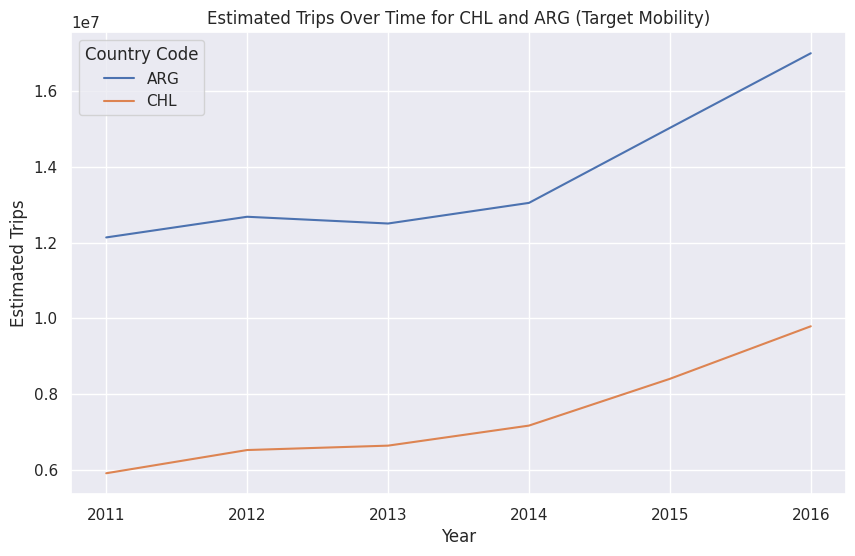

In [19]:
# prompt:  filter  db_indicators for indicator=target_mobility and plot a temporar series plot for CHL and ARG using seaborn

import seaborn as sns

# Assuming db_indicators DataFrame is already created as in the provided code.

# Filter for indicator = 'target_mobility'
filtered_df = db_indicators[db_indicators['indicator'] == 'target_mobility']

# Filter for countries CHL and ARG
countries = ['CHL', 'ARG']
country_df = filtered_df[filtered_df['country_code'].isin(countries)]

# Create the time series plot using seaborn
plt.figure(figsize=(10, 6))
sns.set_theme(style="darkgrid")
sns.lineplot(x='year', y='value', hue='country_code', data=country_df)

plt.xlabel('Year')
plt.ylabel('Estimated Trips')
plt.title('Estimated Trips Over Time for CHL and ARG (Target Mobility)')
plt.legend(title='Country Code')
plt.grid(True)
plt.show()



**(2) Annual migration flow estimates**

migration_flows
from:
https://riks.cris.unu.edu/annual-bilateral-migration-data

In [34]:
# Replace 'your_file_path' with the actual path to your CSV file in Google Drive
file_path = '/content/drive/MyDrive/3. Proyectos/MIGMOBS_nat/3_data_repository/migration_imputed_RIKS_dec2021.csv'

df2 = pd.read_csv(file_path)
print(df2.head())

  iso_or               origin iso_des destination  year  stock  flow  inflow  \
0    AAB  Antigua and Barbuda     ABW       Aruba  1960     16   NaN     NaN   
1    AAB  Antigua and Barbuda     ABW       Aruba  1961     16   0.0     NaN   
2    AAB  Antigua and Barbuda     ABW       Aruba  1962     15  -1.0     NaN   
3    AAB  Antigua and Barbuda     ABW       Aruba  1963     15   0.0     NaN   
4    AAB  Antigua and Barbuda     ABW       Aruba  1964     15   0.0     NaN   

   outflow  
0      NaN  
1      NaN  
2      NaN  
3      NaN  
4      NaN  


In [36]:
countries = ['ARG', 'CHL']
latam_mig_df = df2[(df2['iso_or'].isin(countries)) | (df2['iso_des'].isin(countries))]
print(latam_mig_df.head())

    iso_or               origin iso_des destination  year  stock  flow  \
436    AAB  Antigua and Barbuda     ARG   Argentina  1960      0   0.0   
437    AAB  Antigua and Barbuda     ARG   Argentina  1961      0   0.0   
438    AAB  Antigua and Barbuda     ARG   Argentina  1962      0   0.0   
439    AAB  Antigua and Barbuda     ARG   Argentina  1963      0   0.0   
440    AAB  Antigua and Barbuda     ARG   Argentina  1964      0   0.0   

     inflow  outflow  
436     NaN      NaN  
437     NaN      NaN  
438     NaN      NaN  
439     NaN      NaN  
440     NaN      NaN  


In [38]:
countries = ['ARG', 'CHL']
latam_mig_df = df2[(df2['iso_or'].isin(countries))]
print(latam_mig_df.head())


       iso_or     origin iso_des          destination  year  stock  flow  \
110310    ARG  Argentina     AAB  Antigua and Barbuda  1960      3   NaN   
110311    ARG  Argentina     AAB  Antigua and Barbuda  1961      3   0.0   
110312    ARG  Argentina     AAB  Antigua and Barbuda  1962      3   0.0   
110313    ARG  Argentina     AAB  Antigua and Barbuda  1963      3   0.0   
110314    ARG  Argentina     AAB  Antigua and Barbuda  1964      3   0.0   

        inflow  outflow  
110310     NaN      NaN  
110311     NaN      NaN  
110312     NaN      NaN  
110313     NaN      NaN  
110314     NaN      NaN  


In [40]:

emigration_df = latam_mig_df.groupby(['year', 'iso_or','origin'])['stock'].sum().reset_index()
emigration_df

,year,iso_or,origin,stock
0,1960,ARG,Argentina,154466
1,1960,CHL,Chile,171641
2,1961,ARG,Argentina,160017
3,1961,CHL,Chile,174824
4,1962,ARG,Argentina,155155
...,...,...,...,...
117,2018,CHL,Chile,638045
118,2019,ARG,Argentina,1045452
119,2019,CHL,Chile,638272
120,2020,ARG,Argentina,1077397


In [42]:
#Creo el indicador

db_temp = emigration_df[['iso_or', 'origin', 'year','stock']]
db_temp = db_temp.rename(columns={
    'iso_or': 'country_code',
    'origin': 'country_source',
    'year': 'year',
    'stock': 'value'
})
print(db_temp.head())

  country_code country_source  year   value
0          ARG      Argentina  1960  154466
1          CHL          Chile  1960  171641
2          ARG      Argentina  1961  160017
3          CHL          Chile  1961  174824
4          ARG      Argentina  1962  155155


In [ ]:
db_temp['indicator'] = 'target_mobility_latam'
db_temp['fuente'] = 'Mobitity'